## Read and vizualize .E2E file dataset using eyepy

In [ ]:
import eyepy as ep
import matplotlib.pyplot as plt
from eyepy.data import load 
import numpy as np

In [18]:
# Import HEYEX E2E export
ev = ep.import_heyex_e2e("/home/suraj/Data/ANONYM_OCT-BOTH_EYES_20240424_000.e2e")

## File structure
1. B-scan volume in key `ev.data`
- **Shape:** (31, 496, 768) = 31 B-scans, each 496×768 pixels
- data type: uint8

2. Layer annotations are in key `ev.layers`
- **Available layers:** 11
- **Each layer:** The coordinates for each layer are stored in `.data` attribute within `EyeVolumeLayerAnnotation` object
- **Data shape:** (31, 768) = y-coordinates for each A-scan position across all B-scans
- **Data type:** float64
- layer annotatiosn in key 


In [29]:
# B-scan images
bscans = ev.data  # shape: (31, 496, 768)
print(f"B-scan data shape: {bscans.shape}")
print(f"B-scan data type: {bscans.dtype}")
print()

# layer annotations
layers = ev.layers
print(f"layer names: {list(layers.keys())}")
print()

# Check structure of one layer annotation
ilm_layer = layers['ILM']
print(f"ILM layer shape: {ilm_layer.data.shape}") #shape: (31, 768)
print(f"ILM layer data type: {ilm_layer.data.dtype}") #float64
print(f"ILM data for b-scan index 0: {ilm_layer.data[0]}")

B-scan data shape: (31, 496, 768)
B-scan data type: uint8

layer names: ['ILM', 'BM', 'RNFL', 'GCL', 'IPL', 'INL', 'OPL', 'ELM', 'PR1', 'PR2', 'RPE']

ILM layer shape: (31, 768)
ILM layer data type: float64
ILM data for b-scan index 0: [ 0.          0.          0.          0.          0.                 nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         n

In [49]:
# Function to visualize any B-scan with annotations
def visualize_bscan_with_layers(bscan_idx, figsize=(15, 8))-> None:
    """
    Visualize a B-scan with retinal layer annotations
    
    args:
        bscan_idx: Index of the B-scan to visualize
        figsize: Figure size for the plot
    returns:
        None
    """
    plt.figure(figsize=figsize)
    
    # Display the B-scan image
    plt.imshow(bscans[bscan_idx], cmap='gray', aspect='auto')
    
    selected_layers = ["ILM", "BM", "ELM", "PR1"]
    colors = ['red', 'blue', 'green', 'orange']
    #layer_names = list(layers.keys())
    '''
    for i, layer_name in enumerate(selected_layers):
        layer_data = layers[layer_name].data[bscan_idx]
        
        valid_indices = ~np.isnan(layer_data) # Only plot non- NaN values
        if np.any(valid_indices):
            x_coords = np.where(valid_indices)[0]
            y_coords = layer_data[valid_indices]
            plt.plot(x_coords, y_coords, color=colors[i % len(colors)], 
                    linewidth=2, label=layer_name, alpha=0.8)
    '''
    for i, layer_name in enumerate(selected_layers):
        if layer_name in layers:
            layer_data = layers[layer_name].data[bscan_idx]
            x_coords = np.arange(layer_data.shape[0])
            plt.plot(x_coords, layer_data, color=colors[i % len(colors)],
                    linewidth=2, label=layer_name, alpha=0.8)
    plt.title(f"B-scan {bscan_idx} with Retinal Layer Annotations")
    plt.xlabel("A-scan position (pixel)")
    plt.ylabel("Depth (pixel)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Visualizing B-scan 0:


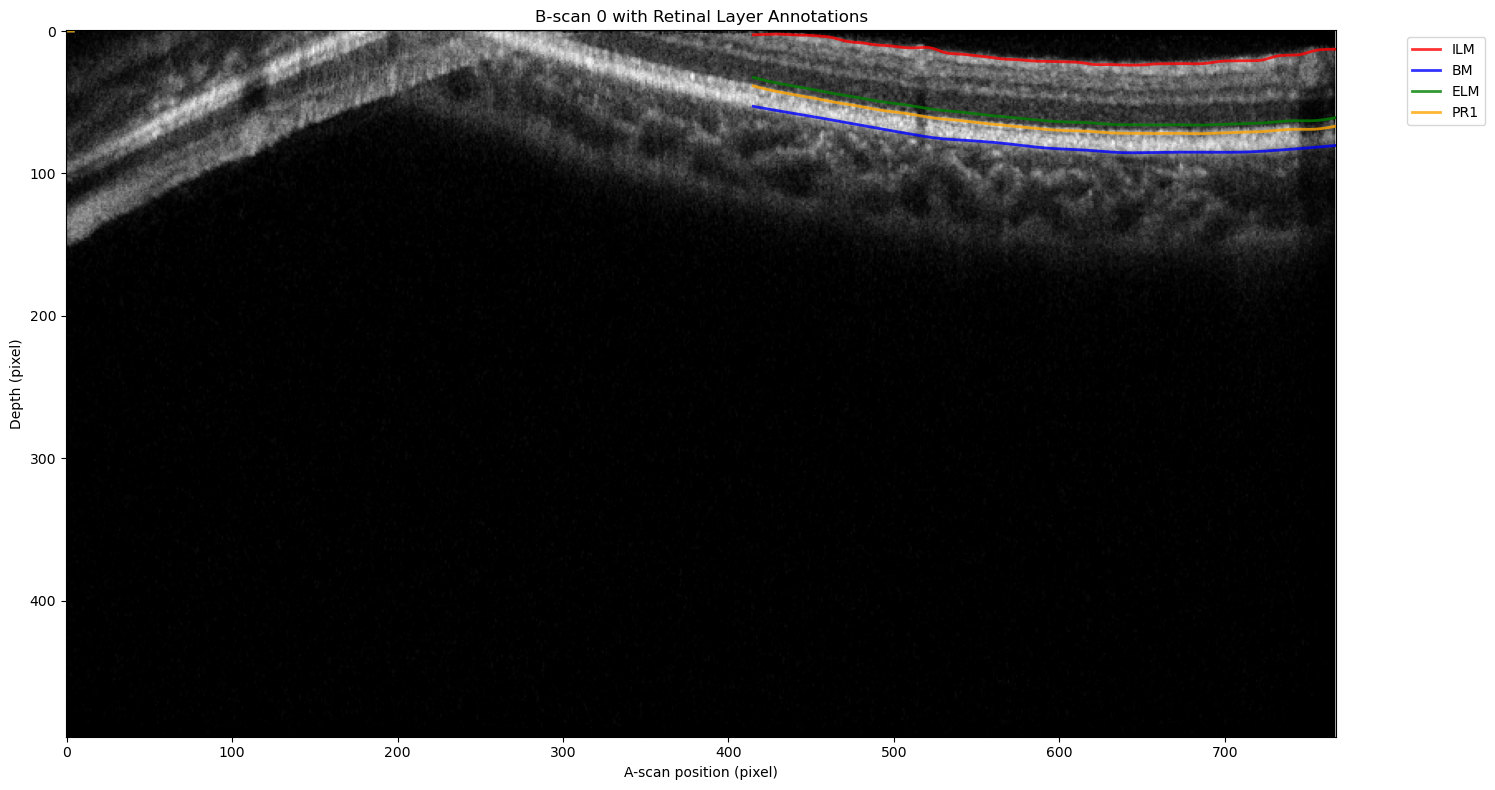

In [50]:
print("Visualizing B-scan 0:")
visualize_bscan_with_layers(0)


Visualizing B-scan index 13:


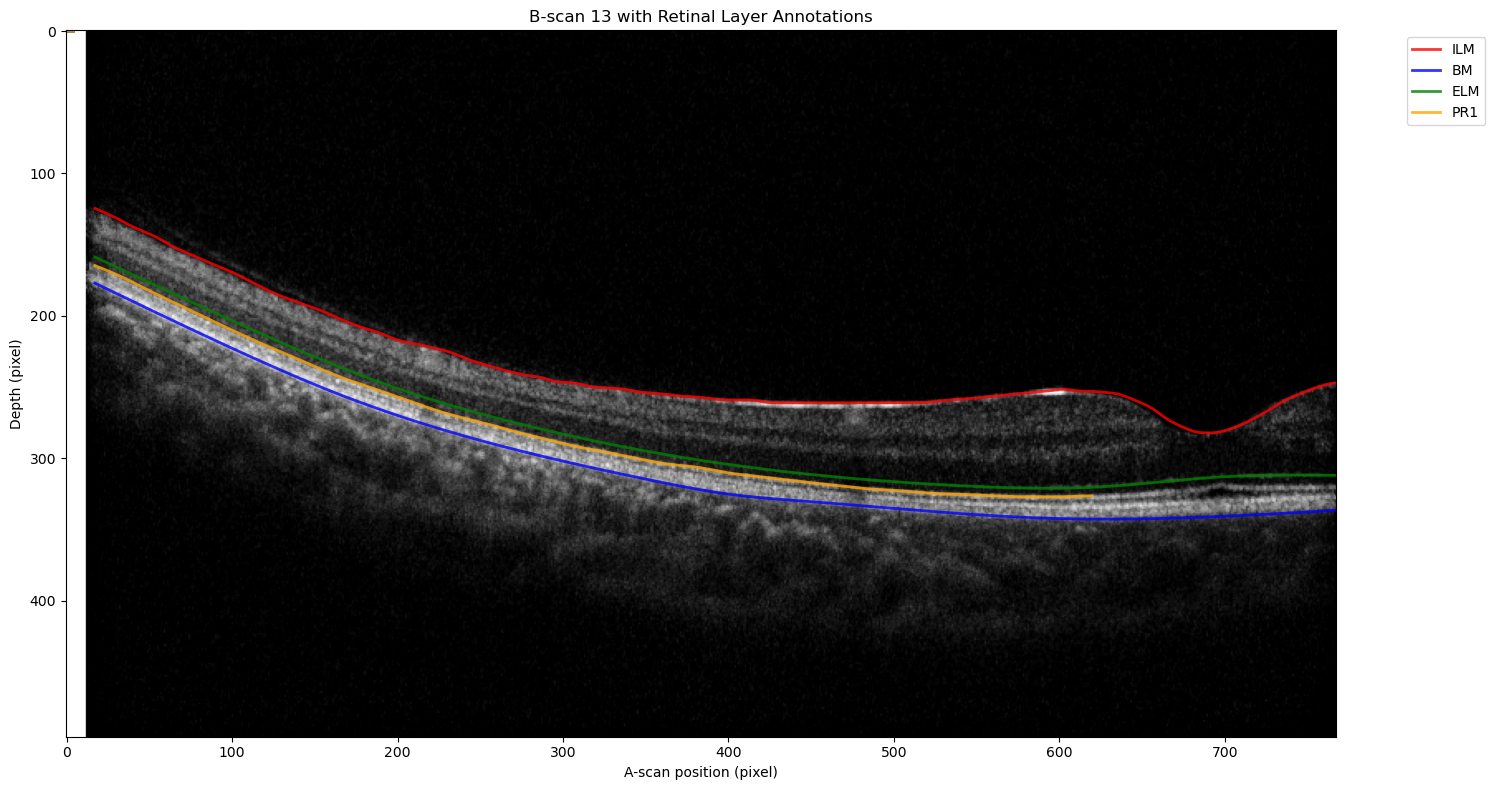

In [51]:
print("\nVisualizing B-scan index 13:")
visualize_bscan_with_layers(13)


Visualizing B-scan index 11:


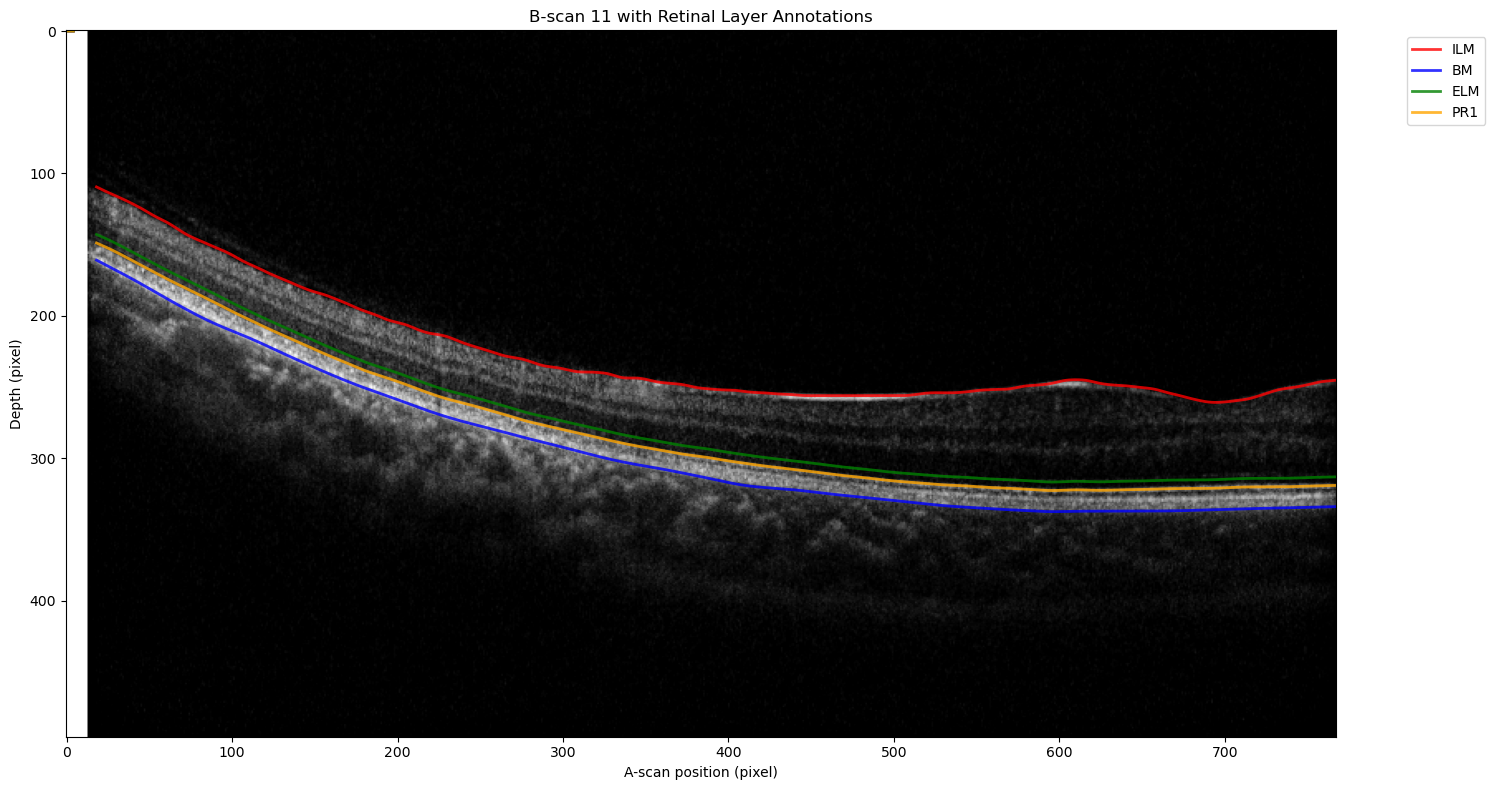

In [52]:
print("\nVisualizing B-scan index 11:")
visualize_bscan_with_layers(11)

In [6]:
# Get the B-scan images as a numpy array
bscans = ev.data  # shape: (num_bscans, height, width)
print(bscans.shape)

(31, 496, 768)


In [7]:
# Get the layer annotations (usually a dict or similar structure)
layers = ev.layers
print(type(layers))
print(layers.keys())  # If it's a dict-like object

<class 'dict'>
dict_keys(['ILM', 'BM', 'RNFL', 'GCL', 'IPL', 'INL', 'OPL', 'ELM', 'PR1', 'PR2', 'RPE'])


In [10]:
lyr = ev._layers
print(type(lyr))
print(len(lyr))  # Print the number of elements in the list

<class 'list'>
11


In [14]:
vol_maps = ev.volume_maps
print(type(vol_maps))
print(vol_maps.keys())  # If it's a dict-like object]
print(len(vol_maps))  # Print the number of elements in the list

<class 'dict'>
dict_keys([])
0
